This notebook contains a brief illustration of the updated sky model. For details refer to Parker's thesis.

In [1]:
import numpy as np 
import astropy.units as u
# -- feasibgs --
from feasibgs import util as UT
from feasibgs import skymodel as Sky
from feasibgs import forwardmodel as FM
# -- desi -- 
import desimodel.io
import desisim.simexp

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
params = desimodel.io.load_desiparams() 
wavemin = params['ccd']['b']['wavemin']
wavemax = params['ccd']['z']['wavemax']
print('%f < lambda < %f' % (wavemin, wavemax))

waves = np.arange(wavemin, wavemax, 0.2) * u.angstrom
config = desisim.simexp._specsim_config_for_wave((waves).to('Angstrom').value, specsim_config_file='desi')
surface_brightness_dict = config.load_table(config.atmosphere.sky, 'surface_brightness', as_dict=True)

3533.000000 < lambda < 9913.000000


(0.0, 10.0)

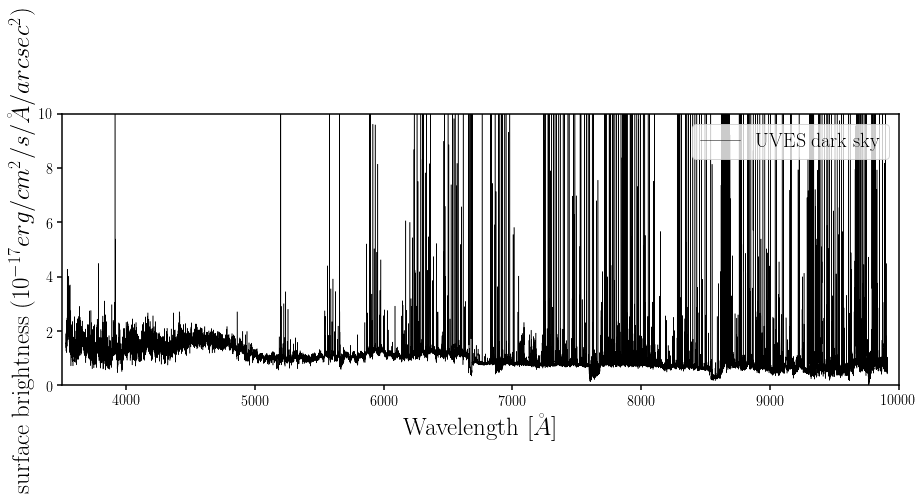

In [4]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(waves, surface_brightness_dict['dark'], c='k', lw=0.5, label='UVES dark sky')
#sub.plot(uves_sky_bright[0], uves_sky_bright[1], c='C1', lw=0.5, label='UVES bright sky')
sub.legend(loc='upper right', fontsize=20, frameon=True)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 10.])

Above is the default dark sky surface brightness currently used in `specsim`. I _believe_ this is derived from UVES. 

In [5]:
desi = FM.SimulatorHacked(config, num_fibers=1, camera_output=True)
airmass = 1.4
alt = 42.18
sep = 69.
ill = 0.42 
desi.atmosphere.airmass = airmass
desi.atmosphere.moon.moon_phase = np.arccos(2.*ill - 1)/np.pi #moon_phase/np.pi #np.arccos(2*moonfrac-1)/np.pi
desi.atmosphere.moon.moon_zenith = (90. - alt) * u.deg
desi.atmosphere.moon.separation_angle = sep * u.deg

(0.0, 10.0)

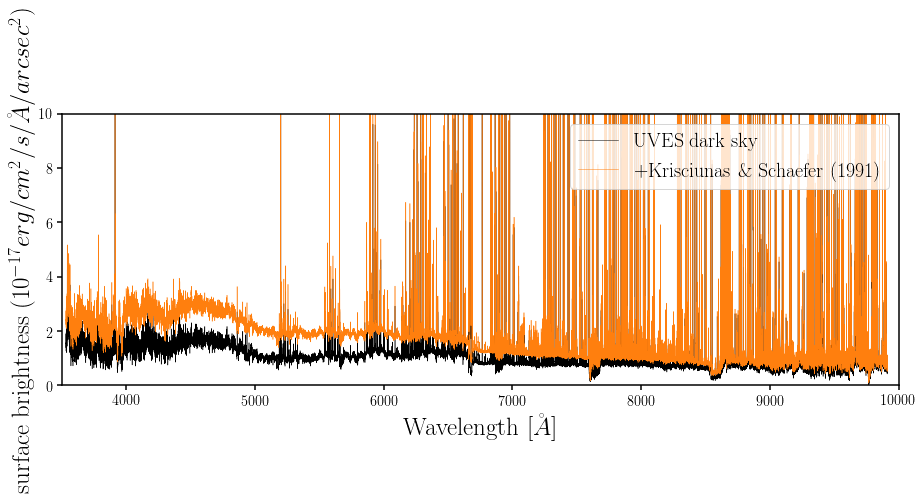

In [6]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(waves, surface_brightness_dict['dark'], 
         c='k', lw=0.5, label='UVES dark sky')
sub.plot(waves, surface_brightness_dict['dark'] + desi.atmosphere.moon.surface_brightness, 
         c='C1', lw=0.5, label=r'+Krisciunas $\&$ Schaefer (1991)')
sub.legend(loc='upper right', fontsize=20, frameon=True)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 10.])

The `specsim` bright sky model combines the UVES dark sky with the moon model from Krisciunas & Schaefer (1991). Above is what the sky surface brightness looks like for the following sky and lunar parameters: 

- `airmass=1.4`
- moon altitude = $42.18$ degrees
- moon separation = $69.$ degrees
- moon illumination = $0.42$. This corresponds to a moon phase of $0.55$

In [7]:
fakedesi = FM.fakeDESIspec()

(0.0, 10.0)

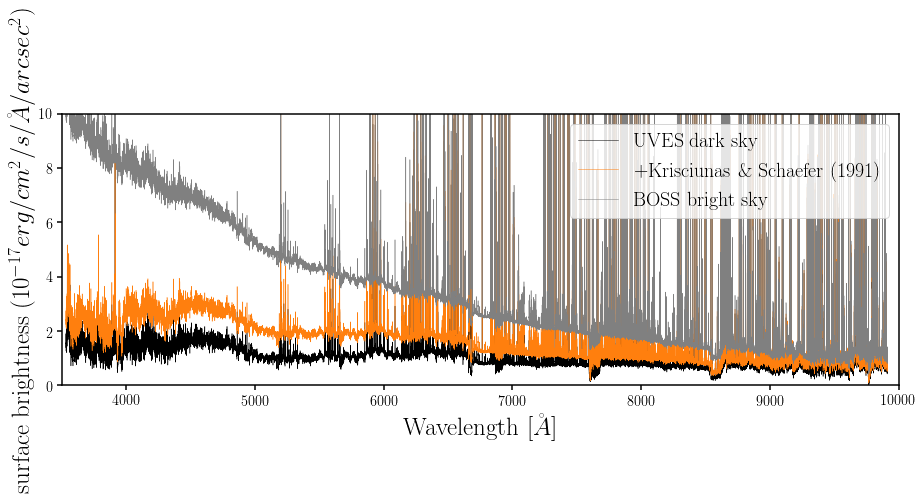

In [8]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(waves, surface_brightness_dict['dark'], 
         c='k', lw=0.5, label='UVES dark sky')
sub.plot(waves, surface_brightness_dict['dark'] + desi.atmosphere.moon.surface_brightness, 
         c='C1', lw=0.5, label=r'+Krisciunas $\&$ Schaefer (1991)')
sub.plot(waves, fakedesi._skySurfBright(waves, cond='bright'), 
         c='gray', lw=0.5, label='BOSS bright sky')
sub.legend(loc='upper right', fontsize=20, frameon=True)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 10.])

In the previous version of `feasiBGS` the bright sky model was a fixed (_i.e._ no parameter dependence). The bright sky surface brightness was derived from some fiducial BOSS bright sky flux. Above is how it compares to the `specsim` bright sky model.

In [9]:
theta_sky = (airmass, 30., 10., 180., 4.86761390e+09, -25., 150., np.arccos(2.*ill - 1), ill, sep, alt)
sky_obj = Sky.skySpec(*theta_sky)

/Users/chang/anaconda2/lib/python2.7/site-packages/feasibgs/skymodel.py:217: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  coeffs = pd.DataFrame.from_csv(f)


(0.0, 10.0)

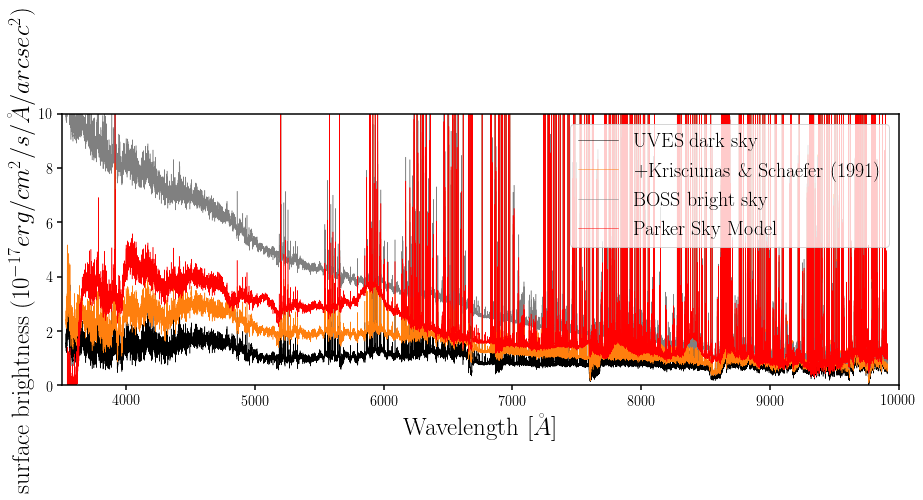

In [10]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(waves, surface_brightness_dict['dark'], 
         c='k', lw=0.5, label='UVES dark sky')
sub.plot(waves, surface_brightness_dict['dark'] + desi.atmosphere.moon.surface_brightness, 
         c='C1', lw=0.5, label=r'+Krisciunas $\&$ Schaefer (1991)')
sub.plot(waves, fakedesi._skySurfBright(waves, cond='bright'), 
         c='gray', lw=0.5, label='BOSS bright sky')
sub.plot(waves, sky_obj.surface_brightness(waves), 
         c='r', lw=0.5, label=r'Parker Sky Model')
sub.legend(loc='upper right', fontsize=20, frameon=True)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 10.])

Here's the updated bright sky model in `feasiBGS`. The sky model depends on 11 parameters: 
- airmass 
- ecliptic latitude
- galactic latitude
- galactic longitude
- time of observation 
- sun altitude
- sun separation
- moon phase
- moon illumination 
- moon separation 
- moon altitude

Above I compare the updated `feasibGS` bright sky model to the `specsim` bright sky model and the BOSS bright sky. I use the same lunar parameters for both `feasiBGS` and `specsim` models. 

(0.0, 10.0)

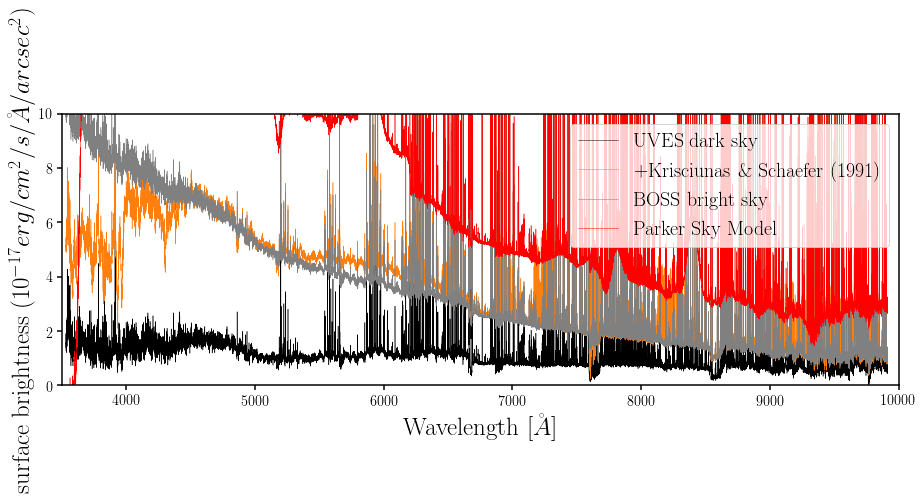

In [11]:
desi = FM.SimulatorHacked(config, num_fibers=1, camera_output=True)
airmass = 1.4
alt = 42.18
sep = 69.
ill = 0.8
desi.atmosphere.airmass = airmass
desi.atmosphere.moon.moon_phase = np.arccos(2.*ill - 1)/np.pi #moon_phase/np.pi #np.arccos(2*moonfrac-1)/np.pi
desi.atmosphere.moon.moon_zenith = (90. - alt) * u.deg
desi.atmosphere.moon.separation_angle = sep * u.deg

theta_sky = (airmass, 30., 10., 180., 4.86761390e+09, -25., 150., np.arccos(2.*ill - 1), ill, sep, alt)
sky_obj = Sky.skySpec(*theta_sky)
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(waves, surface_brightness_dict['dark'], 
         c='k', lw=0.5, label='UVES dark sky')
sub.plot(waves, surface_brightness_dict['dark'] + desi.atmosphere.moon.surface_brightness, 
         c='C1', lw=0.5, label=r'+Krisciunas $\&$ Schaefer (1991)')
sub.plot(waves, fakedesi._skySurfBright(waves, cond='bright'), 
         c='gray', lw=0.5, label='BOSS bright sky')
sub.plot(waves, sky_obj.surface_brightness(waves), 
         c='r', lw=0.5, label=r'Parker Sky Model')
sub.legend(loc='upper right', fontsize=20, frameon=True)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 10.])

Above is the same comparison but for a different set of lunar parameters: 
- airmass = `1.4`
- moon alt = `42.18`
- moon sep = `69.`
- moon ill = `0.8`

(0.0, 10.0)

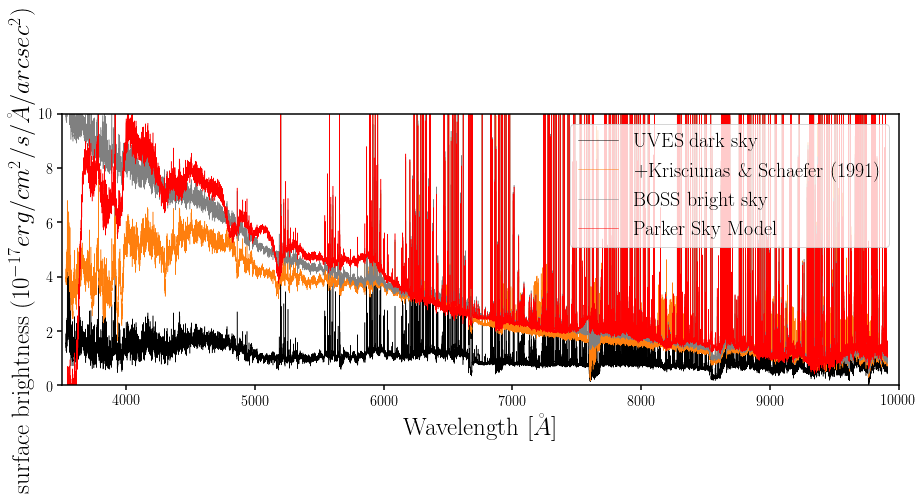

In [12]:
desi = FM.SimulatorHacked(config, num_fibers=1, camera_output=True)
airmass = 1.1
alt = 30.
sep = 120.
ill = 0.8
desi.atmosphere.airmass = airmass
desi.atmosphere.moon.moon_phase = np.arccos(2.*ill - 1)/np.pi #moon_phase/np.pi #np.arccos(2*moonfrac-1)/np.pi
desi.atmosphere.moon.moon_zenith = (90. - alt) * u.deg
desi.atmosphere.moon.separation_angle = sep * u.deg

theta_sky = (airmass, 30., 10., 180., 4.86761390e+09, -25., 150., np.arccos(2.*ill - 1), ill, sep, alt)
sky_obj = Sky.skySpec(*theta_sky)
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(waves, surface_brightness_dict['dark'], 
         c='k', lw=0.5, label='UVES dark sky')
sub.plot(waves, surface_brightness_dict['dark'] + desi.atmosphere.moon.surface_brightness, 
         c='C1', lw=0.5, label=r'+Krisciunas $\&$ Schaefer (1991)')
sub.plot(waves, fakedesi._skySurfBright(waves, cond='bright'), 
         c='gray', lw=0.5, label='BOSS bright sky')
sub.plot(waves, sky_obj.surface_brightness(waves), 
         c='r', lw=0.5, label=r'Parker Sky Model')
sub.legend(loc='upper right', fontsize=20, frameon=True)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 10.])

Above is the same comparison but for a different set of lunar parameters: 
- airmass = `1.1`
- moon alt = `30.`
- moon sep = `120.`
- moon ill = `0.8`